## $$\text{K-means}$$

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Importamos el data set

In [7]:
dataset = pd.read_csv('../data/Mall_Customers.csv')
dataset.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


Un centro comercial que contiene información de los clientes que se suscribieron a una tarjeta de membresía. En el historial podemos ver el score del gasto que realiza el cliente en el centro comercial. 

Lo que pretendemos es segementar a los clientes en grupos, como debería de segmentarse en base a sus ingresos y el gasto en el centro comercial. Dado que el centro comercial no tiene idea de como segmentar los clientes, siendo esto un problema de clustering. 

In [9]:
X = dataset.iloc[:,[3,4]].values

### Método del codo para el número de clusters

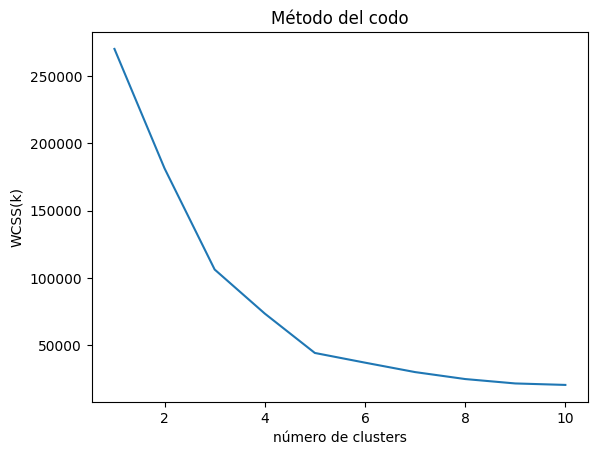

In [13]:
from sklearn.cluster import KMeans 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    # suma de los cuadrados de las distancias de cada punto al centro del cluster
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Método del codo")
plt.xlabel("número de clusters")
plt.ylabel("WCSS(k)")
plt.show()

Vemos que el k optimo es 5

### Aplicar el método de k-means para detectar el data set

In [14]:
kmeans = KMeans(n_clusters=5,init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### Representación visual

In [32]:
kmeans.cluster_centers_[:,0]

array([88.2       , 55.2962963 , 86.53846154, 25.72727273, 26.30434783])

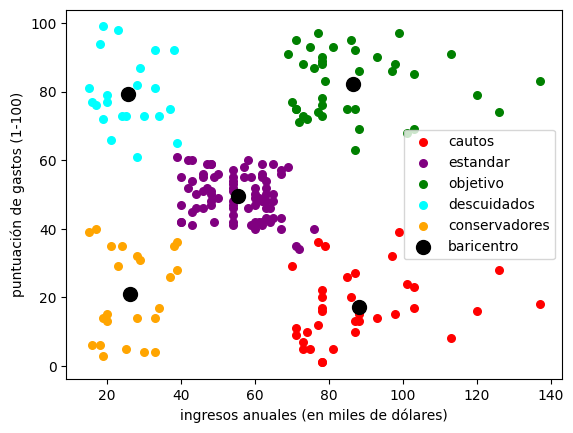

In [35]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=30, c="red", label="cautos")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=30, c="purple", label="estandar")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=30, c="green", label="objetivo")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=30, c="cyan", label="descuidados")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=30, c="orange", label="conservadores")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c="black", label="baricentro")
plt.xlabel('ingresos anuales (en miles de dólares)')
plt.ylabel('puntuación de gastos (1-100)')
plt.legend()
plt.show()

Y es así como podemos enfocar las futuras campañas de marketing

¿Se puede elegir cualquier inicialización aleatoria de los baricentros al inicio del algoritmo de K-Means? `Falso`